#Perceptron con Numpy y Tensorflow2.0

In [0]:
!pip install watermark

In [0]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%reload_ext watermark
%watermark -a "Christian Dayan Arcos Gordillo" --iversion

numpy      1.18.2
tensorflow 2.2.0-rc3
Christian Dayan Arcos Gordillo


##Preparando el dataset

* archivo separado por tab
* contiene 3 columnas: 2 caracteristicas y una clase
* contiene 100 registros ordenados por clases 50 de cada calse

In [0]:
from google.colab import files
files.upload()


In [145]:
data = np.genfromtxt('dataset.txt',delimiter='\t')
X,y = data[:,:2], data[:,2]
y = y.astype(np.int)
print('conteo de cada clase de etiuqeta: ', np.bincount(y))
print('X.shaoe', X.shape)
print('y.shape', y.shape)

conteo de cada clase de etiuqeta:  [50 50]
X.shaoe (100, 2)
y.shape (100,)


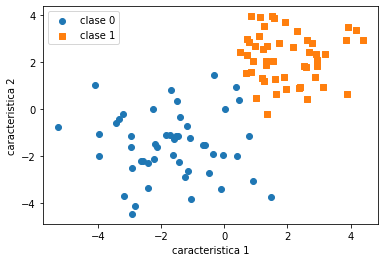

In [41]:
plt.scatter(X[y==0,0],X[y==0,1], label = 'clase 0', marker='o')
plt.scatter(X[y==1,0],X[y==1,1], label = 'clase 1', marker='s')
plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.legend()
plt.show()

##Pre-procesar el dataset

* organizarlo de forma aleatoria
* dividirlo en 70% entrenamiento 30% teste
* seed random para garantizar la reproducción

In [0]:
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y =X[shuffle_idx], y[shuffle_idx]

In [0]:
X_train, X_test = X[shuffle_idx[:70]],X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]],y[shuffle_idx[70:]] 


In [0]:
#normalizar el dataset con media cero y desvio estandar
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu) /sigma


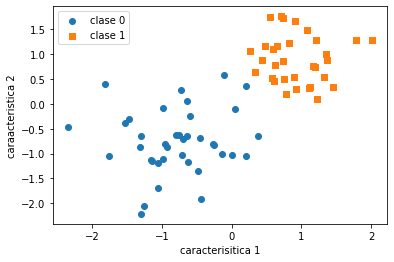

In [45]:
# verificando el dataset despues del pre-procesado
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], label='clase 0', marker='o')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], label='clase 1', marker='s')
plt.xlabel('caracterisitica 1')
plt.ylabel('caraacteristica 2')
plt.legend()
plt.show()

##implementación del perceptrón con numpy

In [0]:
def perceptron_train(features,targets,mparams=None,zero_weights=True, learning_rate=1.,seed=None):
  """Función de entrenamiento Perceptron para etiquetas de clse binaria"""

  #inicializa los parametros del modelo
  if mparams is None:
    mparams = {'bias':np.zeros(1)}
    if zero_weights:
      mparams['weights'] = np.zeros(features.shape[1])
    else:
      rng = np.random.RandomState(seed)
      mparams['weights'] = rng.normal(loc=0.0,scale=0.1,size=(features.shape[1]))

  #entrenamiento de una epoca
  for training_example, true_label in zip(features,targets):
    linear = np.dot(training_example,mparams['weights']) + mparams['bias']

    # si la clase 1 es predicha pero la etiqueta verdadera es 0
    if linear > 0 and not true_label:
      mparams['weights'] -= learning_rate * training_example
      mparams['bias'] -= learning_rate * 1

    # si la calse 0 es predicha pero la etiqueta verdadera es 1
    elif linear <=0 and true_label:
      mparams['weights'] += learning_rate * training_example
      mparams['bias'] += learning_rate * 1

  return mparams



In [0]:
#entrenamiento del modelo perceptron con 2 epocas
model_params = perceptron_train(X_train,y_train,mparams=None,zero_weights=True)

for _ in range(2):
  _ = perceptron_train(X_train,y_train,mparams=model_params)

##Función para predicciones en el modelo perceptron con numpy

In [0]:
def perceptron_predict(features,mparams):
  linear = np.dot(features,mparams['weights']) + mparams['bias']
  predict_labels = np.where(linear.reshape(-1) > 0.,1,0)
  return predict_labels

##Calculo del error de entrenamiento y teste

In [49]:
train_errors = np.sum(perceptron_predict(X_train,model_params) != y_train)
test_errors = np.sum(perceptron_predict(X_test,model_params) != y_test)

print('Numero de errores en entrenamiento', train_errors)
print('Numero de errores en test', test_errors)

Numero de errores en entrenamiento 0
Numero de errores en test 2


##Visualizando el limite de decisión

Perceptron es una función lineal con umbral (threshold)

$$𝑤1𝑥1+𝑤2𝑥2+𝑏≥0.$$
 
Podemos reorganizar esta equación de la siguiente forma:

$$𝑤1𝑥1+𝑏≥0−𝑤2𝑥2$$
 
$$- \frac{w_{1}x_{1}}{{w_2}} - \frac{b}{w_2} \leq x_{2}$$
 


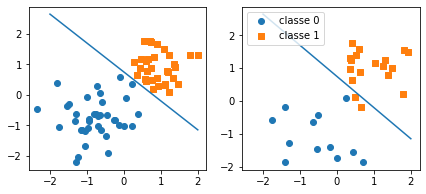

In [50]:
# Limite de Decisión (Hiperplano)
x_min = -2
y_min = ( -(model_params['weights'][0] * x_min) / model_params['weights'][1]
          -(model_params['bias'] / model_params['weights'][1]) )

x_max = 2
y_max = ( -(model_params['weights'][0] * x_max) / model_params['weights'][1]
          -(model_params['bias'] / model_params['weights'][1]) )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='classe 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='classe 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='classe 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='classe 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

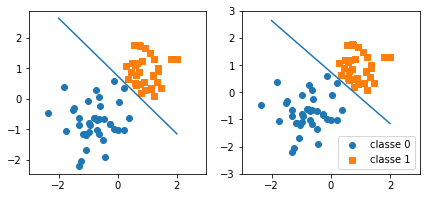

Learning=1. rate params: {'bias': array([-1.]), 'weights': array([1.27340847, 1.34642288])}
Learning=0.01 rate params: {'bias': array([-0.01]), 'weights': array([0.01273408, 0.01346423])}


In [52]:
#  Entrenamiento de perceptron de peso cero con diferentes tasas de aprendizaje 

small_lr_params = perceptron_train(X_train, y_train, learning_rate=0.01, mparams=None, zero_weights=True)

for _ in range(2):
    _ = perceptron_train(X_train, y_train, mparams=small_lr_params)

x_min_small = -2
y_min_small = (-(small_lr_params['weights'][0] * x_min) /
               small_lr_params['weights'][1] -
               (small_lr_params['bias'] / small_lr_params['weights'][1]))

x_max_small = 2
y_max_small = (-(small_lr_params['weights'][0] * x_max) /
               small_lr_params['weights'][1] -
               (small_lr_params['bias'] / small_lr_params['weights'][1]))


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min_small, x_max_small], [y_min_small, y_max_small])

ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='classe 0', marker='o')
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='classe 1', marker='s')

ax[1].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='classe 0', marker='o')
ax[1].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='classe 1', marker='s')

ax[1].legend(loc='lower right')

plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.show()


print('Learning=1. rate params:', model_params)
print('Learning=0.01 rate params:', small_lr_params)

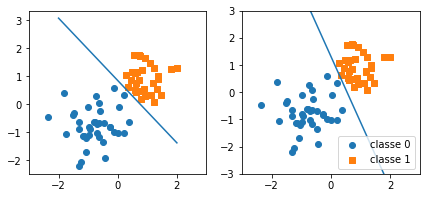

In [53]:
# Ejercício anterior con pesos inicializados aleatoriamente.

randw_params_1 = perceptron_train(X_train, y_train, learning_rate=1.0,
                                  mparams=None, zero_weights=False)

for _ in range(2):
    _ = perceptron_train(X_train, y_train, mparams=randw_params_1)

x_min_1 = -2
y_min_1 = (-(randw_params_1['weights'][0] * x_min) /
           randw_params_1['weights'][1] -
           (randw_params_1['bias'] / randw_params_1['weights'][1]))

x_max_1 = 2
y_max_1 = (-(randw_params_1['weights'][0] * x_max) /
           randw_params_1['weights'][1] -
           (randw_params_1['bias'] / randw_params_1['weights'][1]))


randw_params_2 = perceptron_train(X_train, y_train, learning_rate=0.01, mparams=None, zero_weights=False)

for _ in range(2):
    _ = perceptron_train(X_train, y_train, mparams=randw_params_2)

x_min_2 = -2
y_min_2 = (-(randw_params_2['weights'][0] * x_min) /
           randw_params_2['weights'][1] -
            (randw_params_2['bias'] / randw_params_2['weights'][1]))

x_max_2 = 2
y_max_2 = (-(randw_params_2['weights'][0] * x_max) /
           randw_params_2['weights'][1] -
            (randw_params_2['bias'] / randw_params_2['weights'][1]))


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min_1, x_max_1], [y_min_1, y_max_1])
ax[1].plot([x_min_2, x_max_2], [y_min_2, y_max_2])

ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='classe 0', marker='o')
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='classe 1', marker='s')

ax[1].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='classe 0', marker='o')
ax[1].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='classe 1', marker='s')

ax[1].legend(loc='lower right')

plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.show()

##Implementacion del perceptron con tensorflow

In [55]:
type(X_train)

numpy.ndarray

In [0]:
#Convirtiendo los datos de entrenamiento y teste en tensores

x_train = tf.constant(X_train,dtype=tf.float32)
X_test = tf.constant(X_test,dtype=tf.float32)

y_train = tf.constant(y_train,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)


In [150]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [0]:
n_features = x_train.shape[1]

Entrenando el perceptron com 5 registros del dataset, a manera de ejemplo

In [186]:
i=0
params = {'weights':tf.Variable(tf.zeros(shape=[n_features,1],dtype=tf.float32),name='weights'),
            'bias': tf.Variable([[0.]],dtype=tf.float32,name='bias')}
predictions =[]

for features, targets in zip(x_train,y_train):

  features = tf.reshape(features,shape=(-1,n_features))

  targets = tf.reshape(targets,shape=(-1,1))
  #forward pass
  linear = tf.matmul(features,params['weights']) + params['bias']

  ones = tf.ones(shape=tf.shape(input=linear))
  zeros = tf.zeros(shape=(tf.shape(input=linear)))
  prediction = tf.where(tf.less(linear,0),zeros,ones, name='prediction')
  if prediction == targets:
    predictions.append(prediction.numpy())
  #Actualización de pesos
  diff = targets - prediction
  weight_update = params['weights'].assign_add(tf.reshape(diff*features,(n_features,1)))
  bias_update = params['bias'].assign_add(diff)
  i+=1
  if i>=5:
    break

print ('parametros del modelo', params)
 
print('Numero de errores de entrenamiento', np.sum(predictions))

parametros del modelo {'weights': <tf.Variable 'weights:0' shape=(2, 1) dtype=float32, numpy=
array([[1.4725705 ],
       [0.30436274]], dtype=float32)>, 'bias': <tf.Variable 'bias:0' shape=(1, 1) dtype=float32, numpy=array([[-1.]], dtype=float32)>}
Numero de errores de entrenamiento 3.0


###Entrenando el modelo para una epoca completa

In [0]:
def perceptron_tensor(features, targets, epochs):

  
  params = {'weights':tf.Variable(tf.zeros(shape=[n_features,1],dtype=tf.float32),name='weights'),
            'bias': tf.Variable([[0.]],dtype=tf.float32,name='bias')}
  for epoch in range(epochs):
    predictions =[]
    for feature, target in zip(features,targets):
      feature = tf.reshape(feature,shape=(-1,n_features))

      target = tf.reshape(target,shape=(-1,1))
      #forward pass
      linear = tf.matmul(feature,params['weights']) + params['bias']
      ones = tf.ones(shape=tf.shape(input=linear))
      zeros = tf.zeros(shape=(tf.shape(input=linear)))
      prediction = tf.where(tf.less(linear,0),zeros,ones, name='prediction')
      if prediction != target:
        predictions.append(prediction.numpy())
      #Actualización de pesos
      diff = target - prediction
      params['weights'].assign_add(tf.reshape(diff*feature,(n_features,1)))
      params['bias'].assign_add(diff)
    print('Numero de errores de entrenamiento {}, en la epoca {}'.format(np.sum(predictions),epoch))

  print ('parametros del modelo', params) 
  print('Numero de errores de entrenamiento final', np.sum(predictions))

In [213]:
perceptron_tensor(x_train,y_train,2)

Numero de errores de entrenamiento 2.0, en la epoca 0
Numero de errores de entrenamiento 0.0, en la epoca 1
parametros del modelo {'weights': <tf.Variable 'weights:0' shape=(2, 1) dtype=float32, numpy=
array([[2.0293188],
       [0.5932976]], dtype=float32)>, 'bias': <tf.Variable 'bias:0' shape=(1, 1) dtype=float32, numpy=array([[-1.]], dtype=float32)>}
Numero de errores de entrenamiento final 0.0
